<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Dataset-feature-description" data-toc-modified-id="Dataset-feature-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset feature description</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Pycaret-Model-Selection" data-toc-modified-id="Pycaret-Model-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pycaret Model Selection</a></span></li><li><span><a href="#Lightgbm(best-model)-feature-importance" data-toc-modified-id="Lightgbm(best-model)-feature-importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Lightgbm(best model) feature importance</a></span></li><li><span><a href="#Chi2" data-toc-modified-id="Chi2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Chi2</a></span></li><li><span><a href="#Mutual-info-feature-selection" data-toc-modified-id="Mutual-info-feature-selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Mutual info feature selection</a></span></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model training</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

# Problem statement

Company Introduction
Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

Current Scenario
The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.


Problem Statement
In this step, the problem statement of the project and the project deliverables are defined.

Please refer the video in order to get a good understanding of what to expect in this step. After that, you can go through the text below to get the specific details related to this project.

The current process suffers from the following problems:

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

We are provided with a dataset containing all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).

This is the data that we have to predict for future customers.


The dataset is divided into two parts: Train, and Test sets.

Train Set:
The train set contains 8124 rows and 32 columns.
The last column Revenue_Grid is the target variable.

Test Set:
The test set contains 2031 rows and 31 columns.
The test set doesn’t contain the Revenue_Grid column.
It needs to be predicted for the test set.

# Dataset feature description

In [ ]:
''''''''''
Dataset Feature Description
The Dataset contains the following columns:

Column Name	Description
REF_NO	Reference Number of the customer.
children	Number of children each customer has.
Age_band	Age Group to which the customer belongs.
status	Marital Status of the customer.
occupation	Job or profession of the customer.
occupation_partner	Job or profession of the customer's partner.
home_status	Home Status of the customers.
family_income	Income Range of the customer's family.
self_employed	Whether self-employed or not.
self_employed_partner	Whether the partner self-employed or not.
year_last_moved	Moving Year from the last location of the customer.
TVarea	Television Region of the customer.
post_code	Postal Code of the customer.
post_area	Postal Area of the customer.
Average_Credit_Card_Transaction	Average Credit Card Transaction per year by the customer.
Balance_Transfer	Transfer of the Balance in an account to another account by the customer.
Term_Deposit	Cash Investment Help at Financial Institute provided to the customer.
Life_Insurance	Basic Life Insurance Coverage of the customer.
Medical_Insurance	Medical Insurance Coverage of the customer.
Average_A/C_Balance	Average Balance in the account of the customer.
Personal_Loan	Amount of Personal Loan taken by the customer.
Investment_in_Mutual_Fund	Amount Invested in Mutual Funds by the customer.
Investment_Tax_Saving_Bond	Amount Invested in Tax Saving Bond by the customer.
Home_Loan	Amount of Home Loan taken by the customer.
Online_Purchase_Amount	Amount spent by the customer on online purchases.
gender	Gender of the customer.
region	Religion of the customer.
Investment_in_Commudity	Amount Invested in Commodity by the customer.
Investment_in_Equity	Amount Invested in Equity by the customer.
Investment_in_Derivative	Amount Invested in Derivatives by the customer.
Portfolio_Balance	Balanced Investment Strategy of the customer.
Revenue_Grid	Grid report of the customers.
'''''''''

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv('bank_train.csv')

# EDA

In [44]:
df.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [45]:
df.describe()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

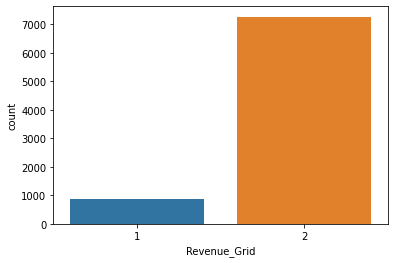

In [37]:
sns.countplot(df.Revenue_Grid)

In [ ]:
cat=['children','age_band','status','occupation','occupation_partner','home_status','family_income','self_employed','self_employed_partner','gender','region']

In [ ]:
num=['Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Life_Insurance','Medical_Insurance','Average_A/C_Balance','Personal_Loan','Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Home_Loan','Online_Purchase_Amount','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative','Portfolio_Balance']

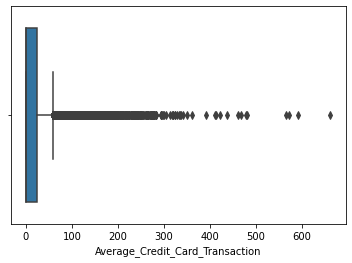

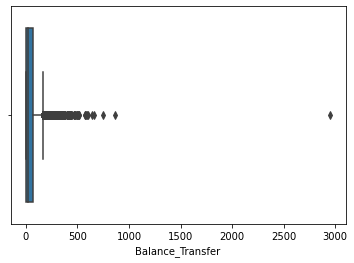

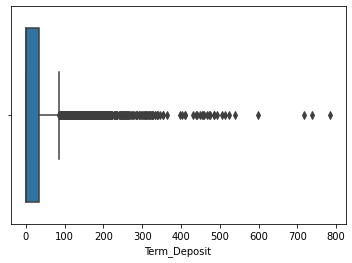

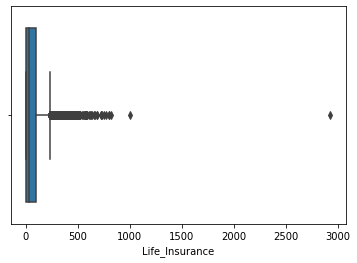

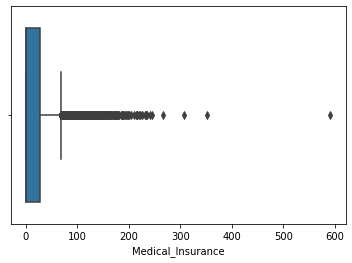

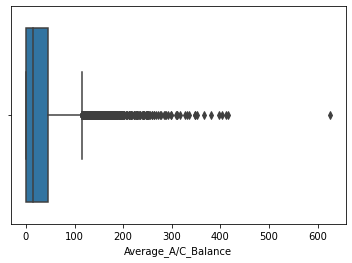

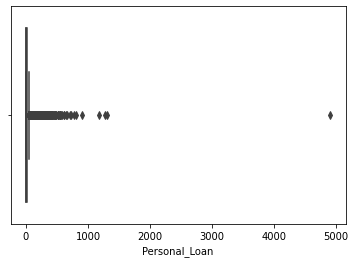

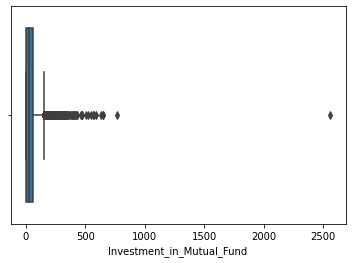

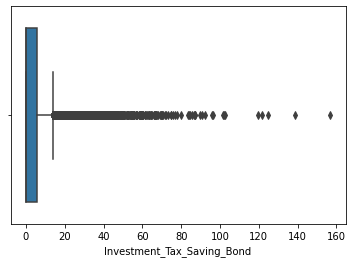

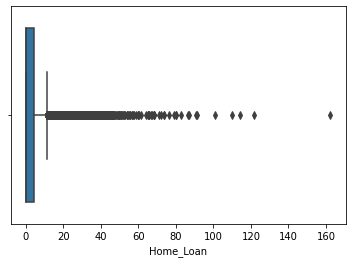

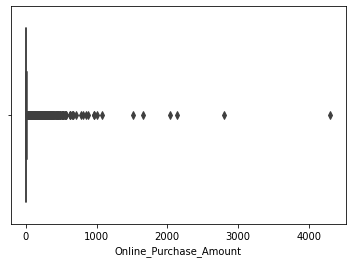

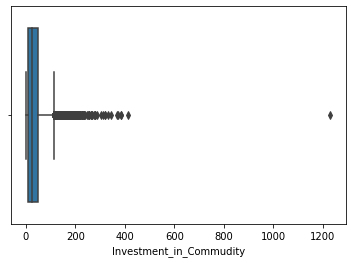

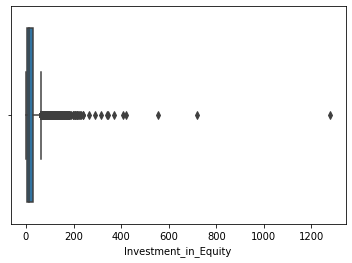

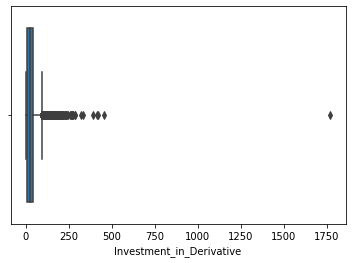

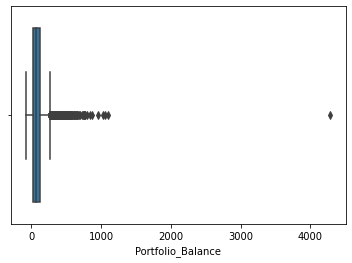

In [38]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.boxplot(df[col])

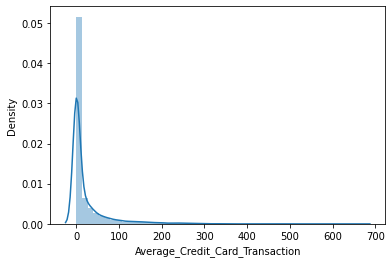

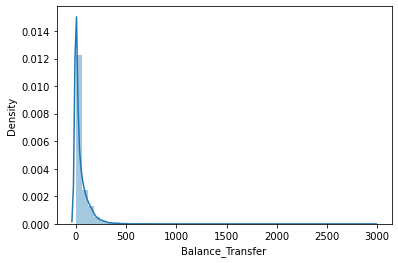

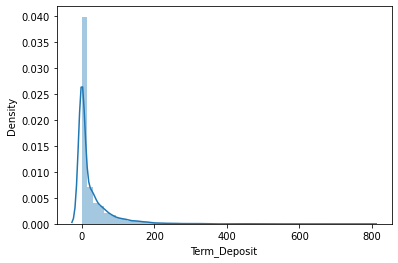

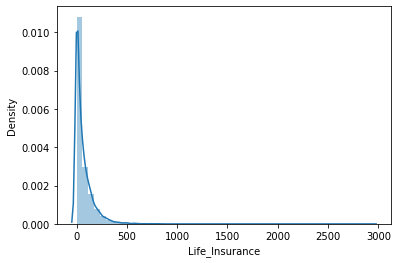

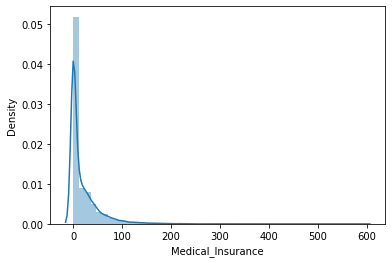

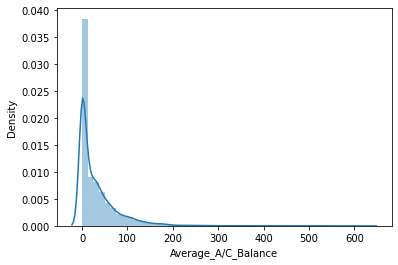

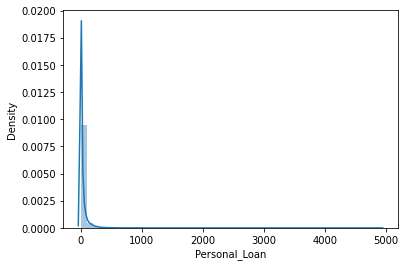

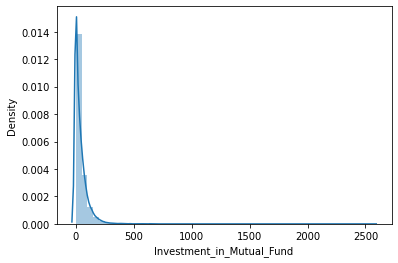

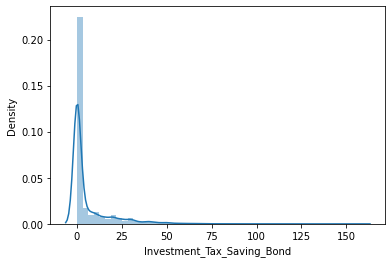

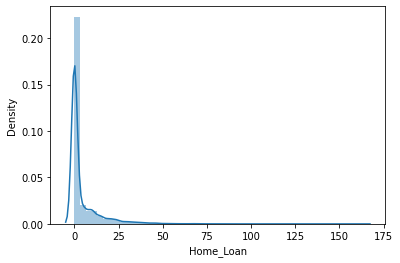

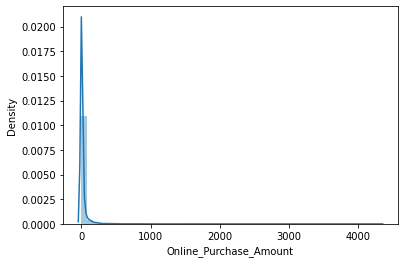

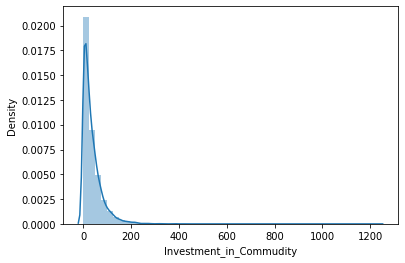

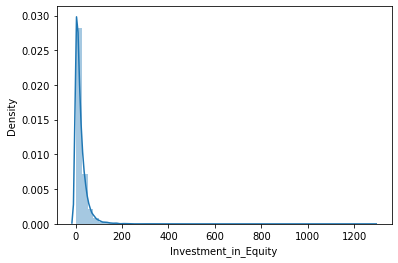

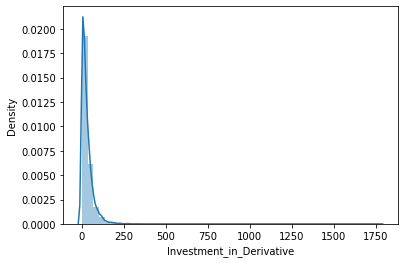

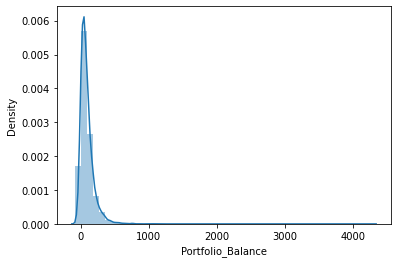

In [39]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.distplot(df[col])

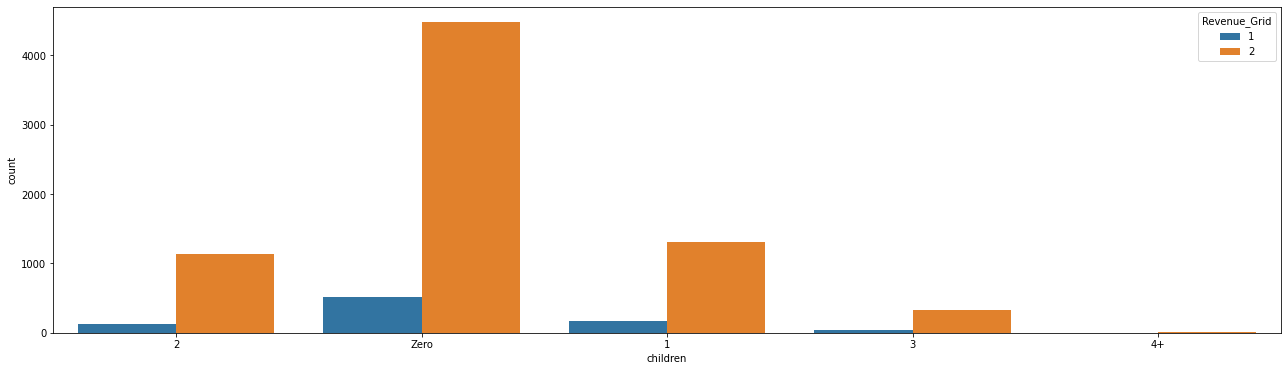

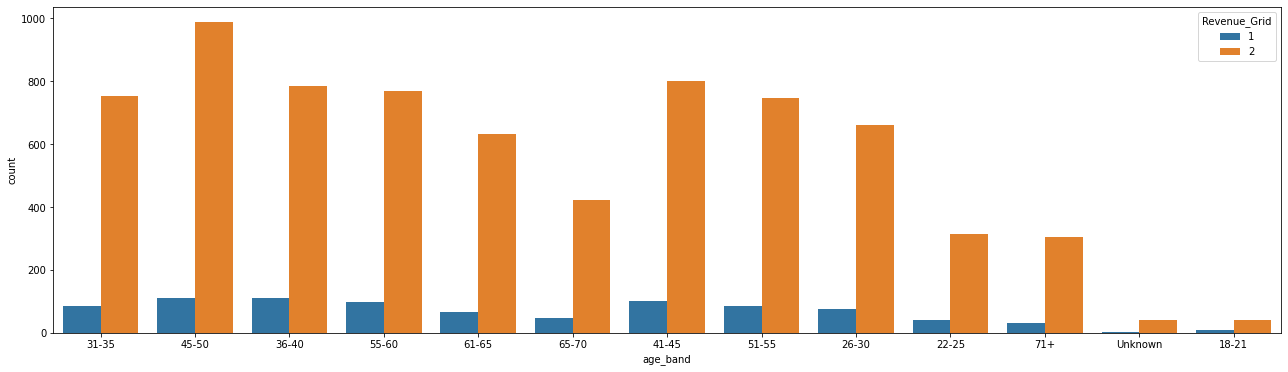

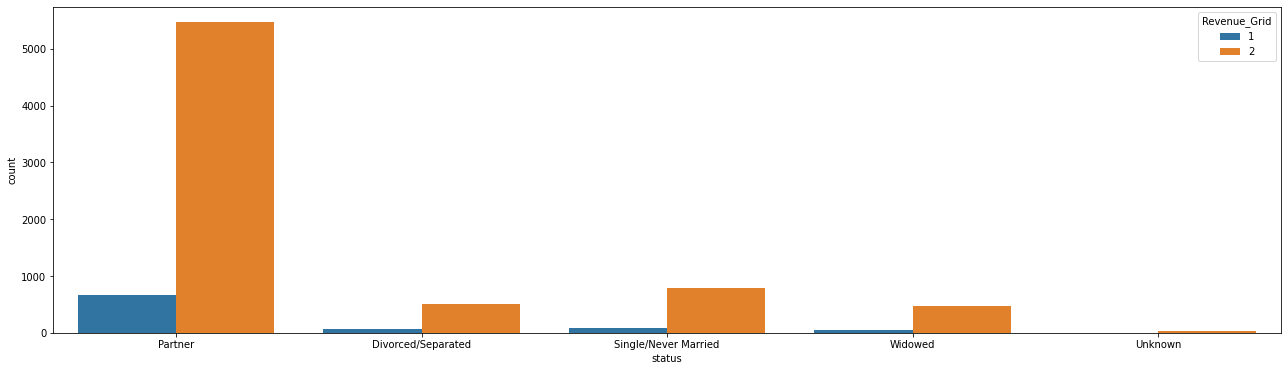

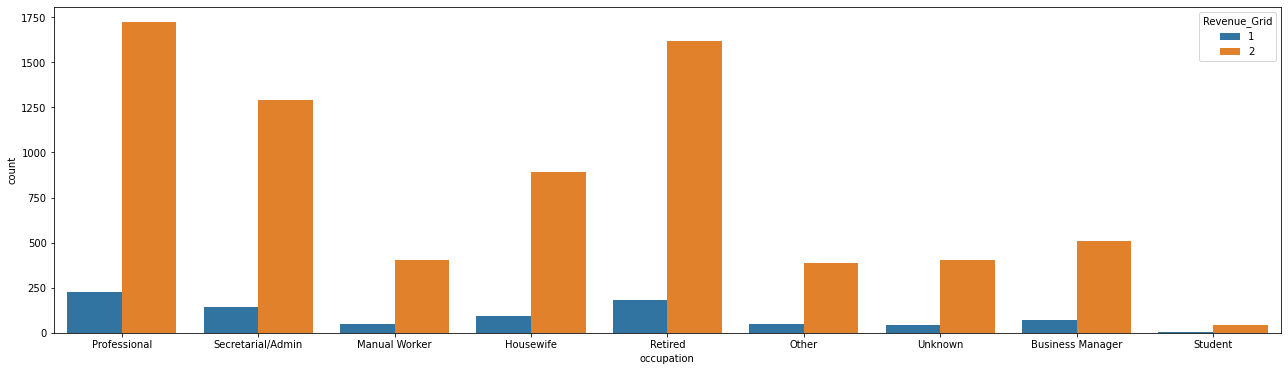

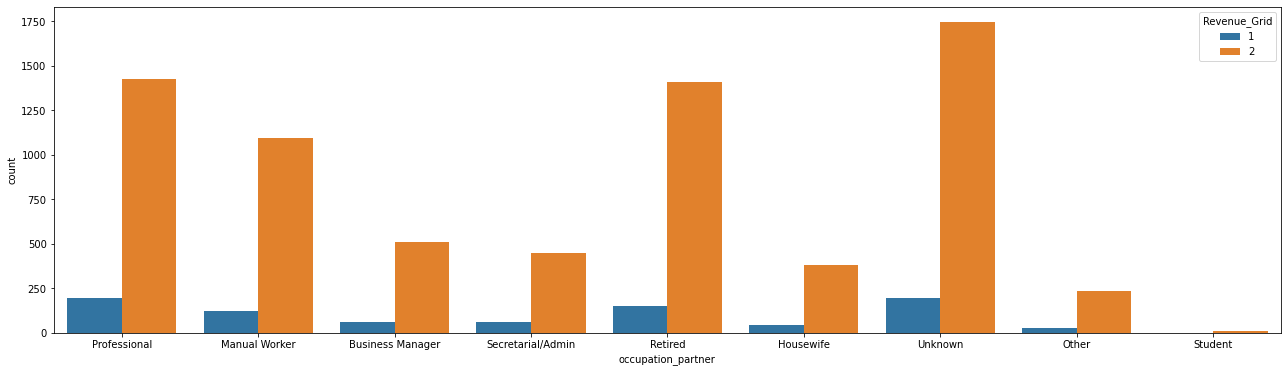

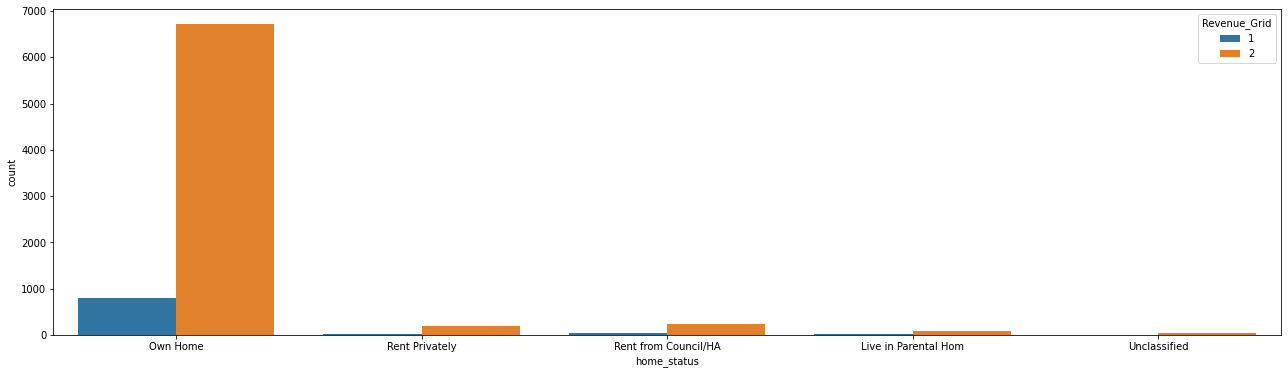

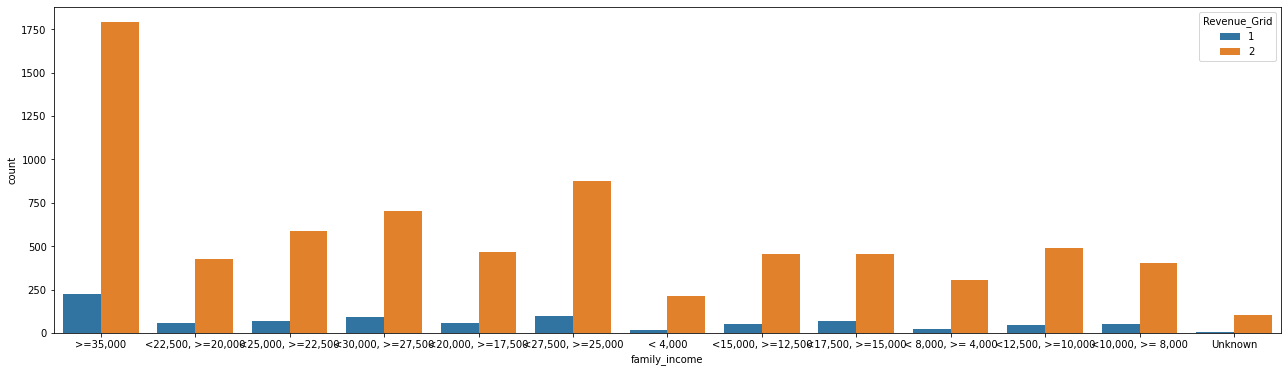

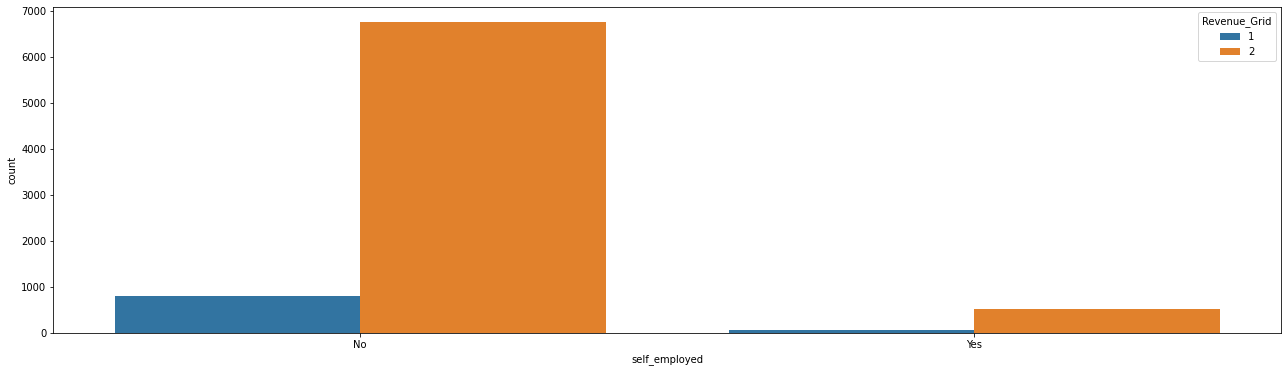

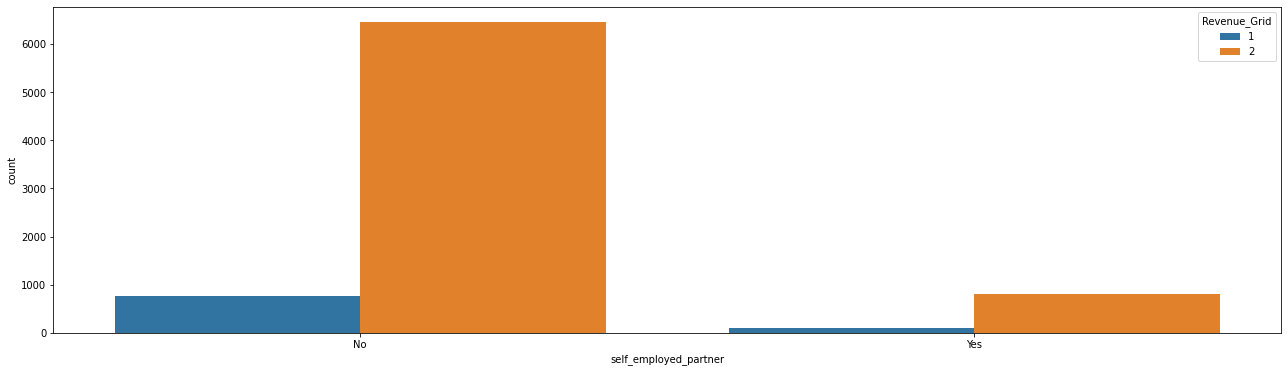

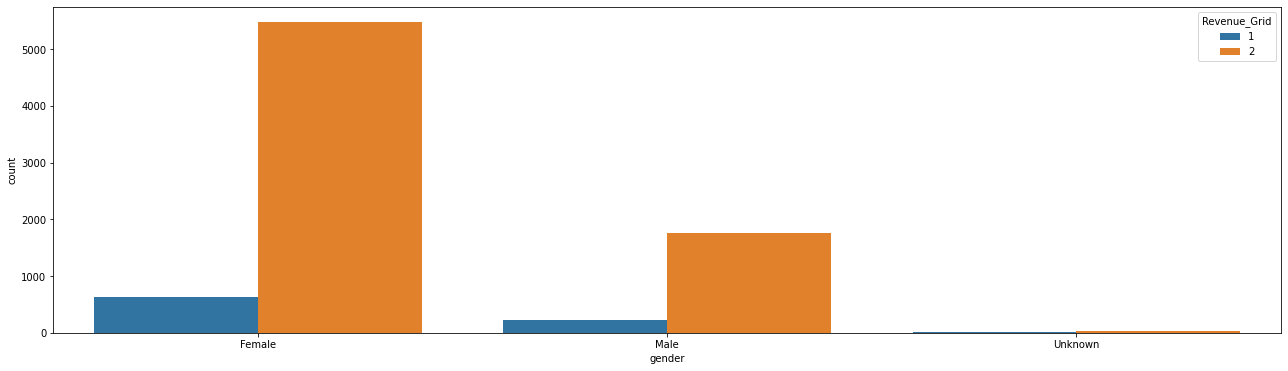

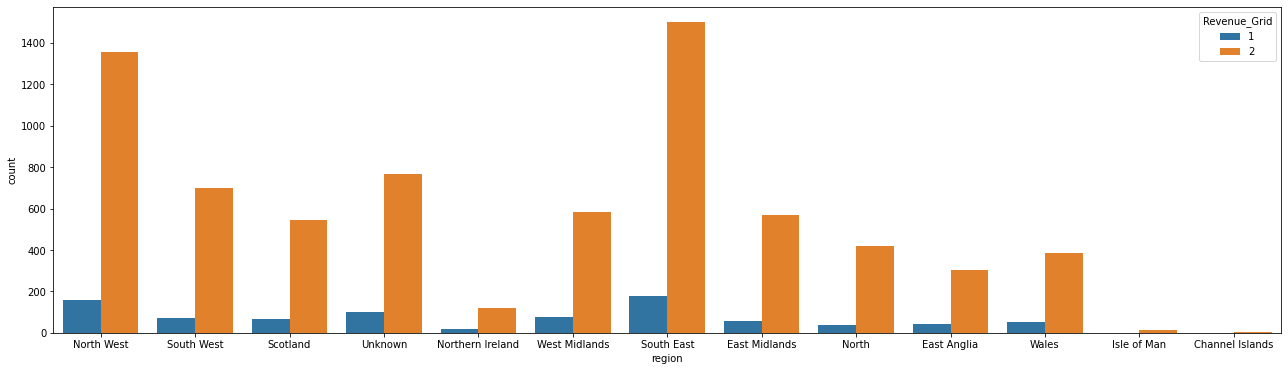

In [40]:
for i, col in enumerate(df[(cat)]):
    plt.figure(i,figsize=(22,6))
    sns.countplot(df[col],hue=df['Revenue_Grid'])

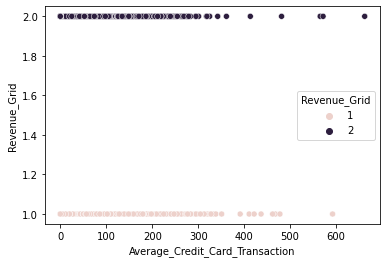

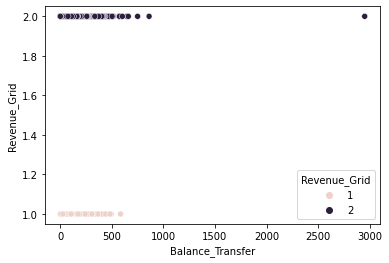

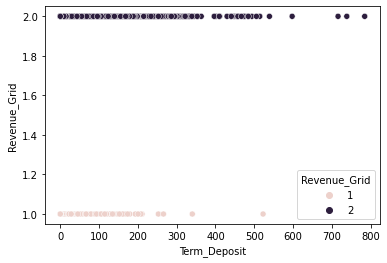

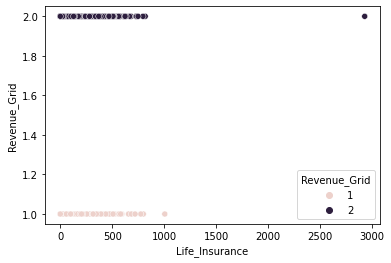

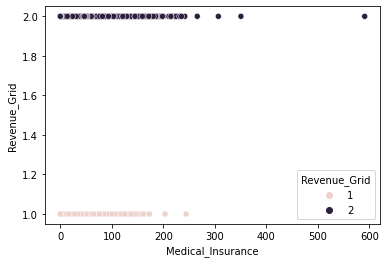

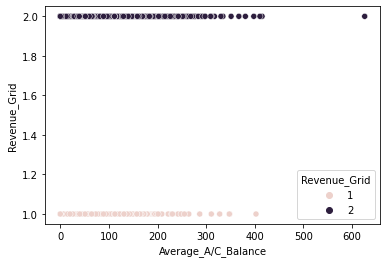

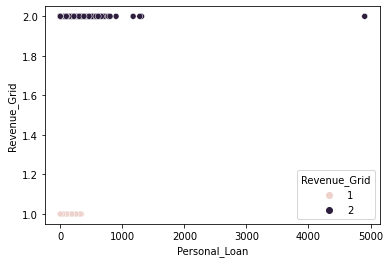

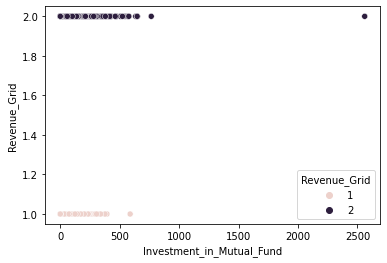

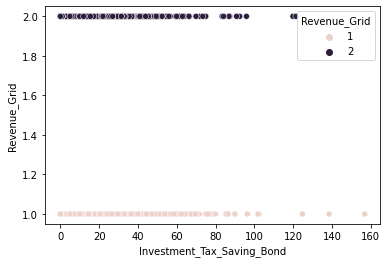

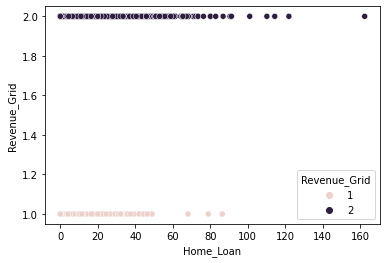

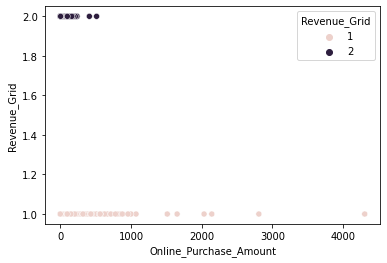

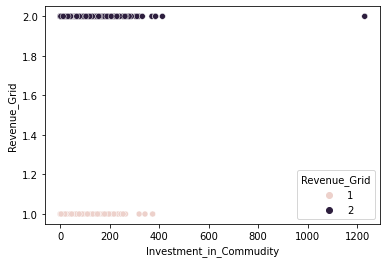

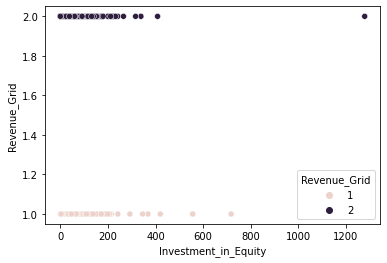

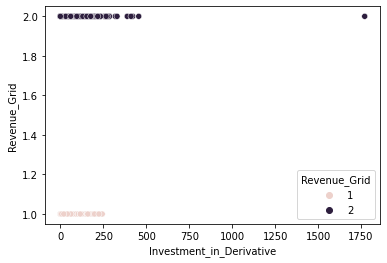

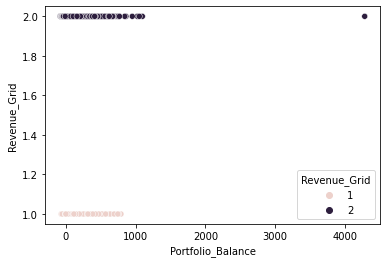

In [41]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.scatterplot(df[col],df['Revenue_Grid'],hue=df['Revenue_Grid'])

<Figure size 1296x864 with 0 Axes>

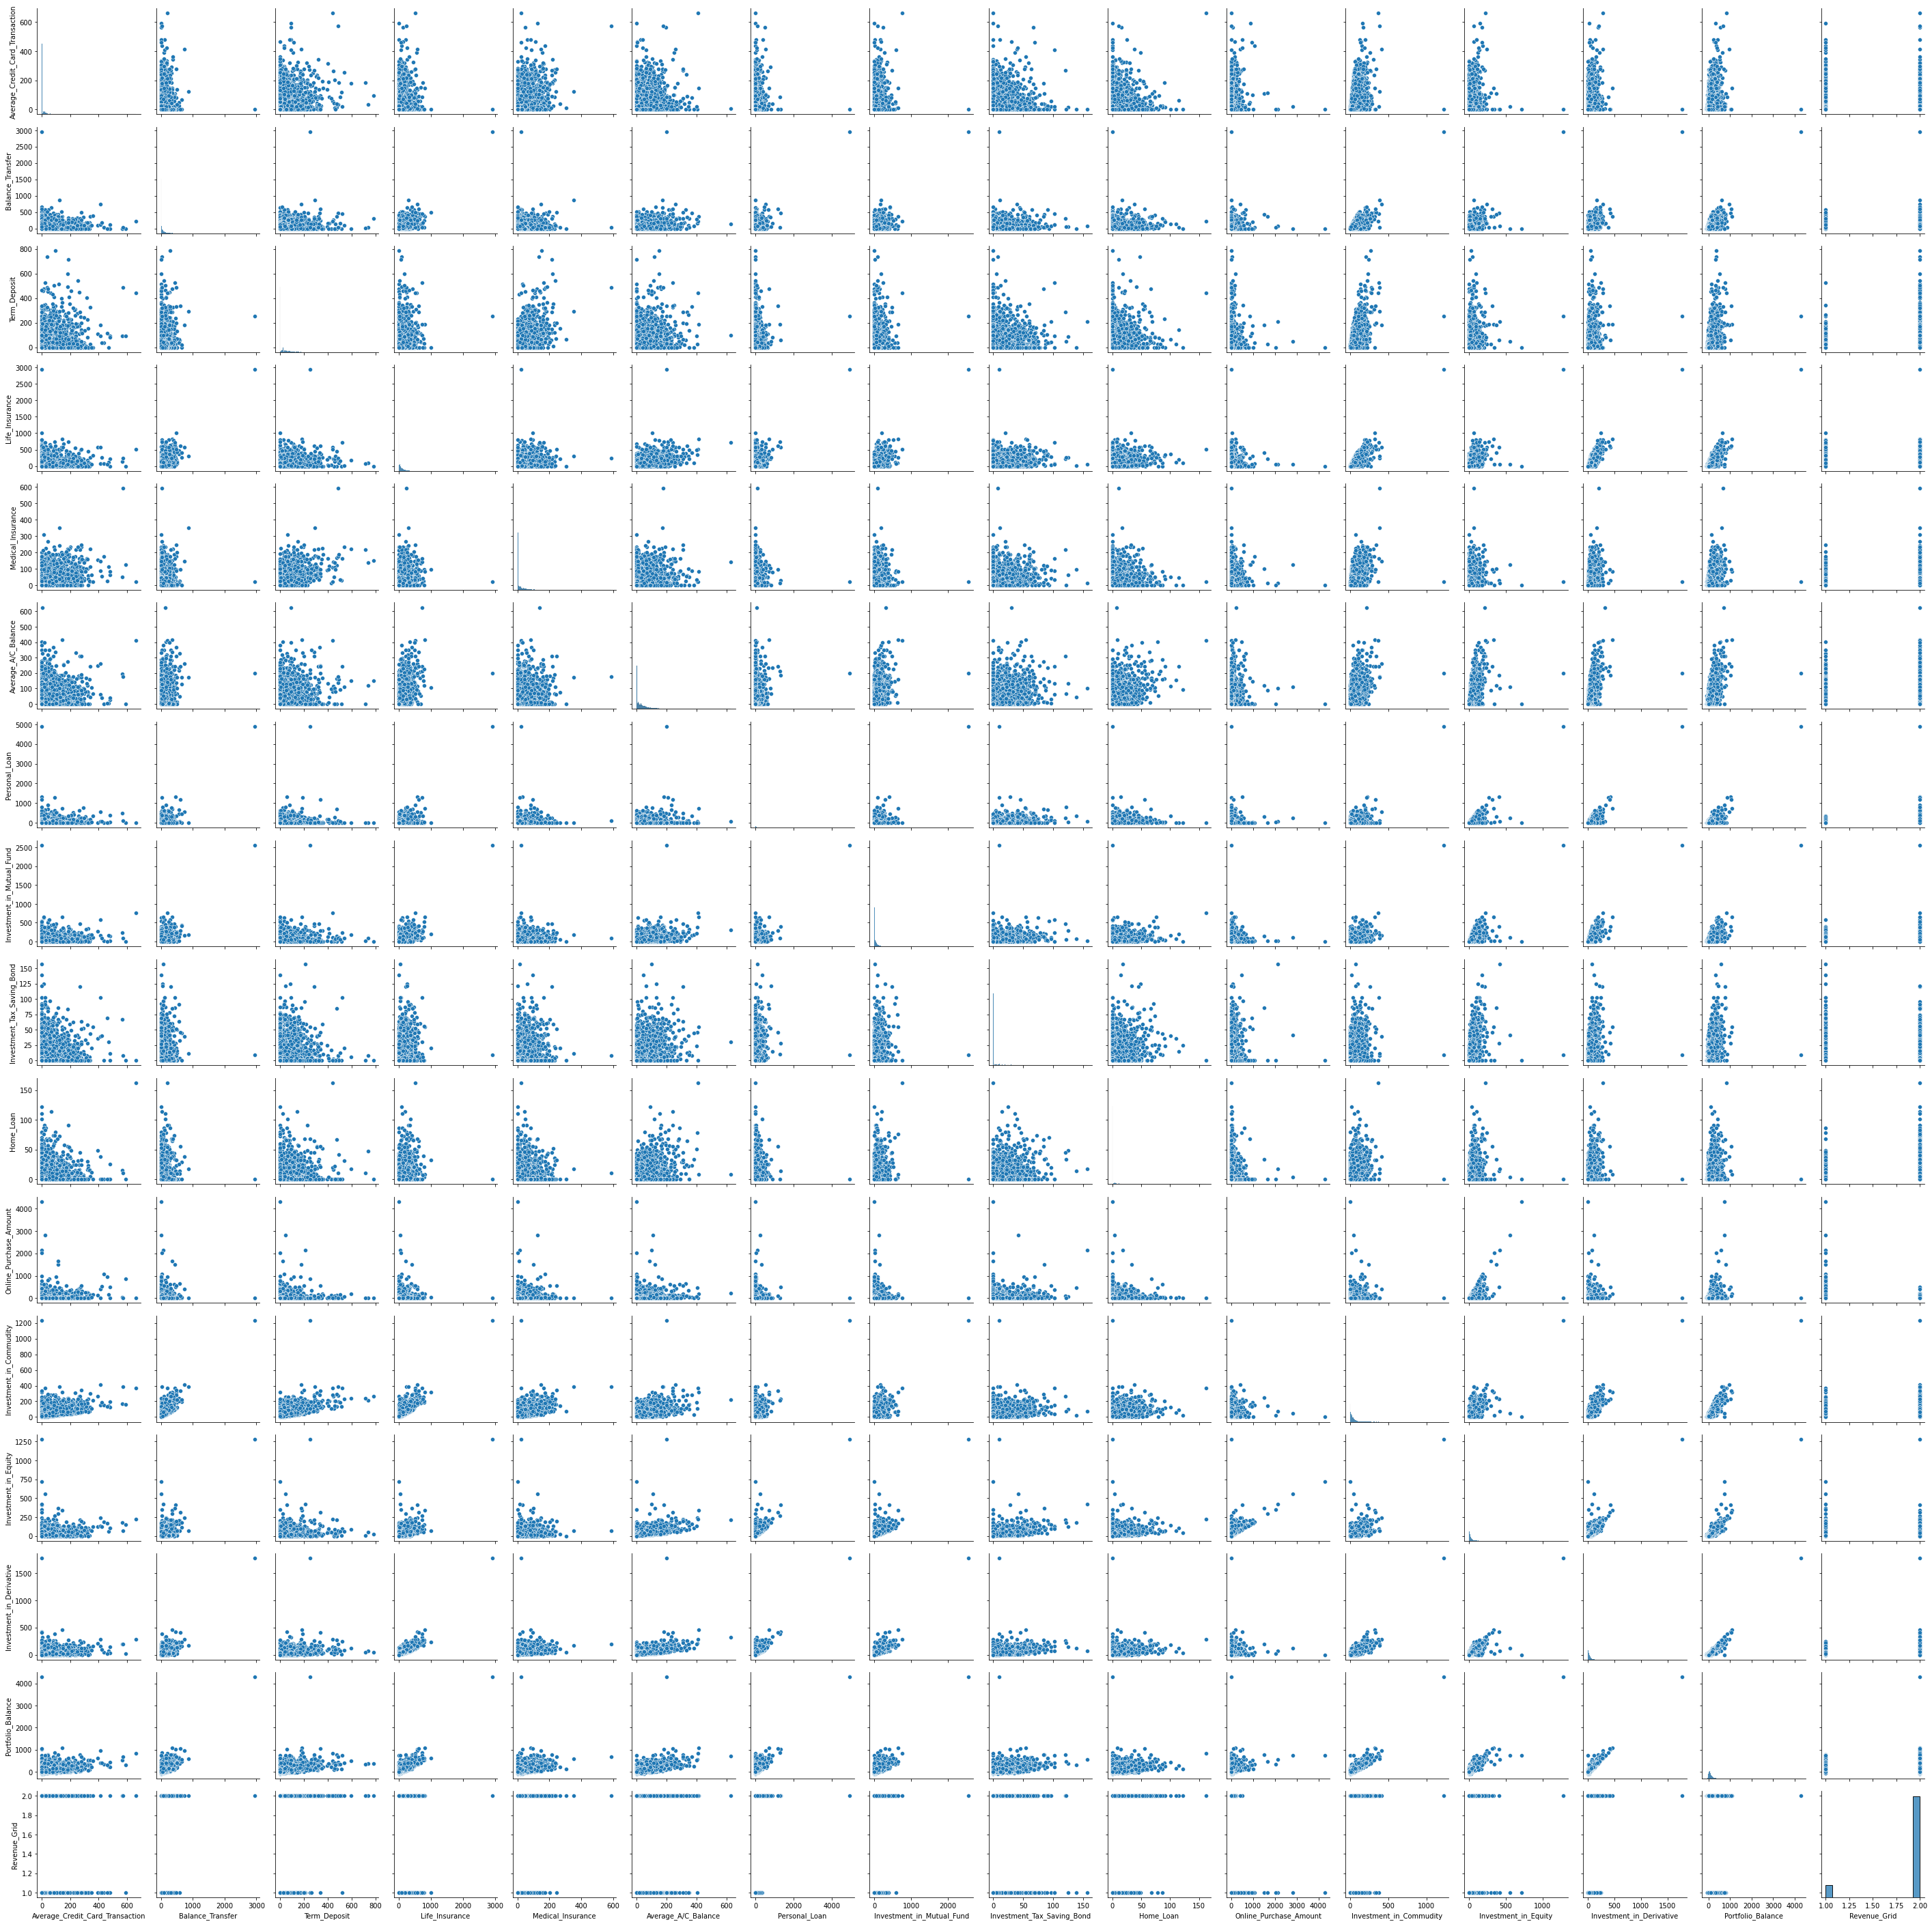

In [43]:
plt.figure(figsize=(18,12))
sns.pairplot(data=df,vars=['Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Life_Insurance','Medical_Insurance','Average_A/C_Balance','Personal_Loan','Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Home_Loan','Online_Purchase_Amount','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative','Portfolio_Balance','Revenue_Grid'])

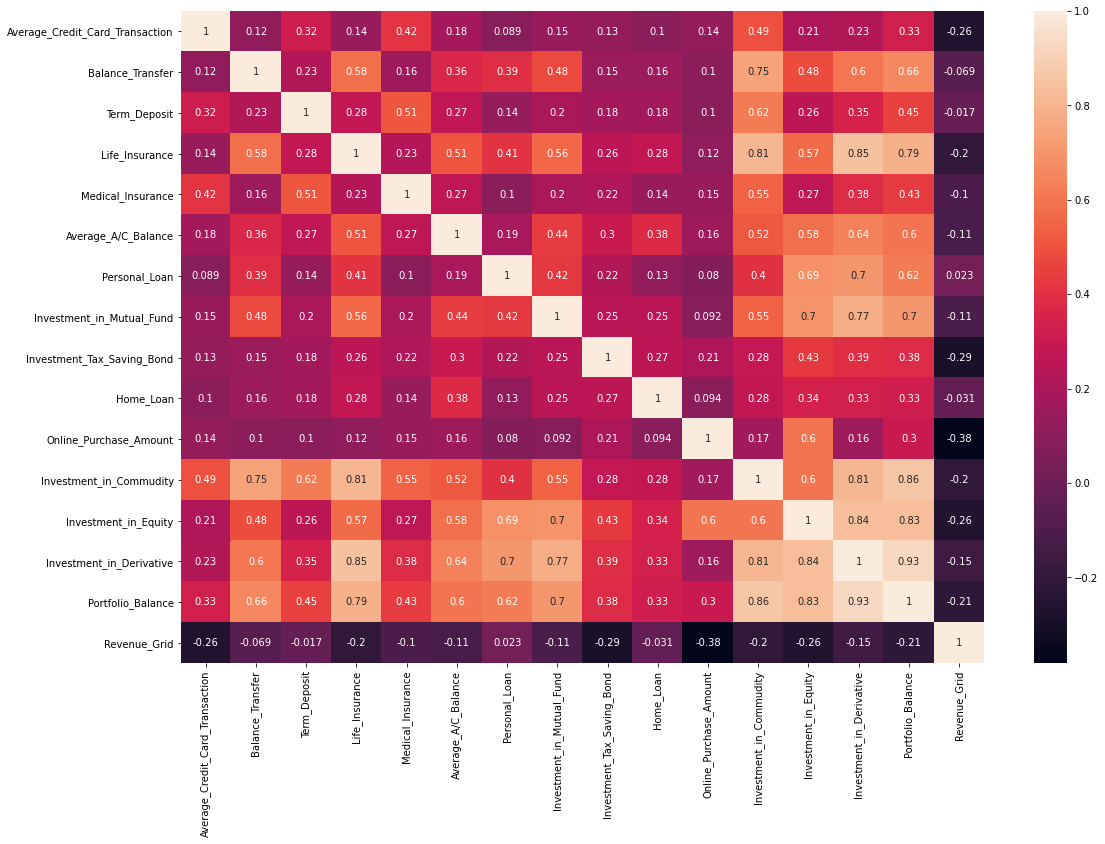

In [42]:
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(corr,data=df,annot=True)

# Pycaret Model Selection

In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(data = df, 
          target = 'Revenue_Grid')

,Description,Value
0,session_id,8064
1,Target,Revenue_Grid
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(8124, 32)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9666,0.9899,0.9882,0.9748,0.9814,0.8166,0.8189,1.570
gbc,Gradient Boosting Classifier,0.9536,0.9676,0.9862,0.9627,0.9743,0.7342,0.7408,29.766
dt,Decision Tree Classifier,0.9486,0.8556,0.9742,0.9685,0.9713,0.7266,0.7282,2.197
ada,Ada Boost Classifier,0.9441,0.9575,0.9831,0.9556,0.9691,0.6729,0.6819,8.364
lr,Logistic Regression,0.9413,0.9377,0.9825,0.9532,0.9676,0.6550,0.6659,59.535
rf,Random Forest Classifier,0.9131,0.9633,0.9998,0.9114,0.9536,0.2989,0.4170,6.106
knn,K Neighbors Classifier,0.9119,0.7934,0.9939,0.9148,0.9527,0.3281,0.4068,9.593
ridge,Ridge Classifier,0.9047,0.0000,0.9955,0.9068,0.9491,0.2281,0.3231,37.062
et,Extra Trees Classifier,0.8978,0.9393,0.9996,0.8976,0.9458,0.0898,0.2037,14.831
qda,Quadratic Discriminant Analysis,0.8954,0.5139,1.0000,0.8950,0.9446,0.0482,0.1466,114.035


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1758, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
gbm  = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9666,0.9893,0.9862,0.9766,0.9814,0.8217,0.8226
1,0.9772,0.9885,0.9921,0.9824,0.9872,0.8780,0.8790
2,0.9772,0.9925,0.9901,0.9843,0.9872,0.8798,0.8801
3,0.9736,0.9954,0.9941,0.9767,0.9853,0.8550,0.8583
4,0.9824,0.9971,0.9921,0.9882,0.9902,0.9082,0.9083
5,0.9649,0.9898,0.9822,0.9783,0.9803,0.8190,0.8191
6,0.9701,0.9957,0.9921,0.9748,0.9833,0.8356,0.8388
7,0.9560,0.9883,0.9862,0.9652,0.9756,0.7546,0.7590
8,0.9613,0.9916,0.9763,0.9802,0.9782,0.8036,0.8037
9,0.9595,0.9790,0.9881,0.9671,0.9775,0.7742,0.7788


In [ ]:
tuned_gbm = tune_model(gbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9649,0.9877,0.9862,0.9747,0.9804,0.8110,0.8123
1,0.9666,0.9809,0.9803,0.9822,0.9812,0.8292,0.8293
2,0.9649,0.9879,0.9882,0.9728,0.9804,0.8081,0.8105
3,0.9719,0.9955,0.9980,0.9712,0.9844,0.8393,0.8477
4,0.9772,0.9958,0.9921,0.9824,0.9872,0.8780,0.8790
5,0.9543,0.9849,0.9763,0.9724,0.9744,0.7647,0.7648
6,0.9665,0.9938,0.9941,0.9692,0.9815,0.8106,0.8175
7,0.9577,0.9793,0.9881,0.9653,0.9766,0.7626,0.7680
8,0.9613,0.9871,0.9822,0.9745,0.9783,0.7950,0.7956
9,0.9542,0.9622,0.9921,0.9580,0.9748,0.7303,0.7433


In [ ]:
tuned_gbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=300, n_jobs=-1, num_leaves=50, objective=None,
               random_state=8064, reg_alpha=0.01, reg_lambda=5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predictions = predict_model(tuned_gbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9709,0.9904,0.9868,0.981,0.9839,0.8312,0.8316


In [ ]:
evaluate_model(tuned_gbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Lightgbm(best model) feature importance


 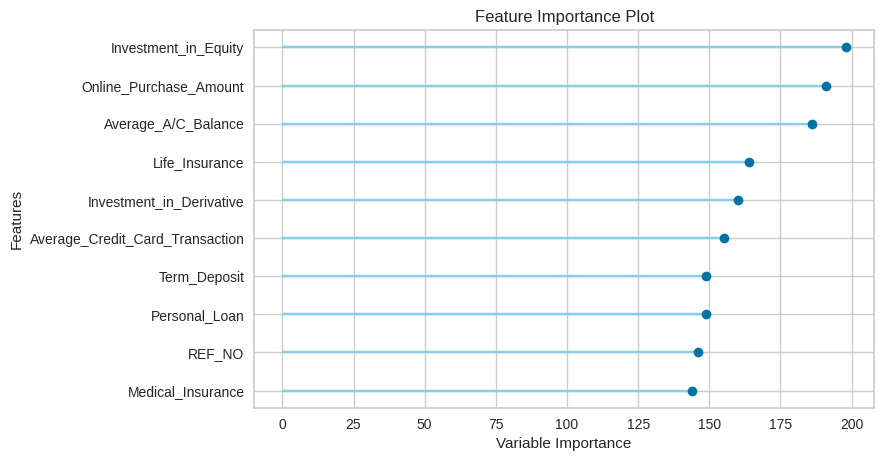


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[(num)]=scaler.fit_transform(df[(num)])

In [ ]:
df.drop(columns=['REF_NO','year_last_moved','TVarea','post_code','post_area'],inplace=True)

In [58]:
X = df.drop(columns=['Revenue_Grid'], axis=1)
y = df['Revenue_Grid']

In [59]:
from category_encoders import OrdinalEncoder
oe = OrdinalEncoder( handle_unknown='ignore',cols=['children','age_band','status','occupation','occupation_partner','home_status','family_income','self_employed','self_employed_partner','gender','region'])
X = oe.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Chi2

In [62]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X[(cat)],y)

In [63]:
p_values=pd.Series(f_p_values[1])
p_values.index=X[(cat)].columns
p_values.sort_index(ascending=False)

status                   0.320826
self_employed_partner    0.839437
self_employed            0.903069
region                   0.794578
occupation_partner       0.027628
occupation               0.698494
home_status              0.892511
gender                   0.538328
family_income            0.007112
children                 0.457877
age_band                 0.680037
dtype: float64

# Mutual info feature selection

In [70]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)


In [69]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
print(mutual_info.sort_values(ascending=False))

Online_Purchase_Amount             0.110018
Investment_in_Equity               0.042679
Investment_in_Commudity            0.038321
Portfolio_Balance                  0.031297
Average_Credit_Card_Transaction    0.026740
Investment_Tax_Saving_Bond         0.023914
Life_Insurance                     0.018832
Investment_in_Derivative           0.016321
Medical_Insurance                  0.011402
Investment_in_Mutual_Fund          0.006737
Average_A/C_Balance                0.005627
Balance_Transfer                   0.005341
age_band                           0.004959
Personal_Loan                      0.004668
gender                             0.004050
occupation_partner                 0.003904
status                             0.001937
Term_Deposit                       0.001827
self_employed_partner              0.001682
children                           0.000880
Home_Loan                          0.000169
home_status                        0.000000
occupation                      

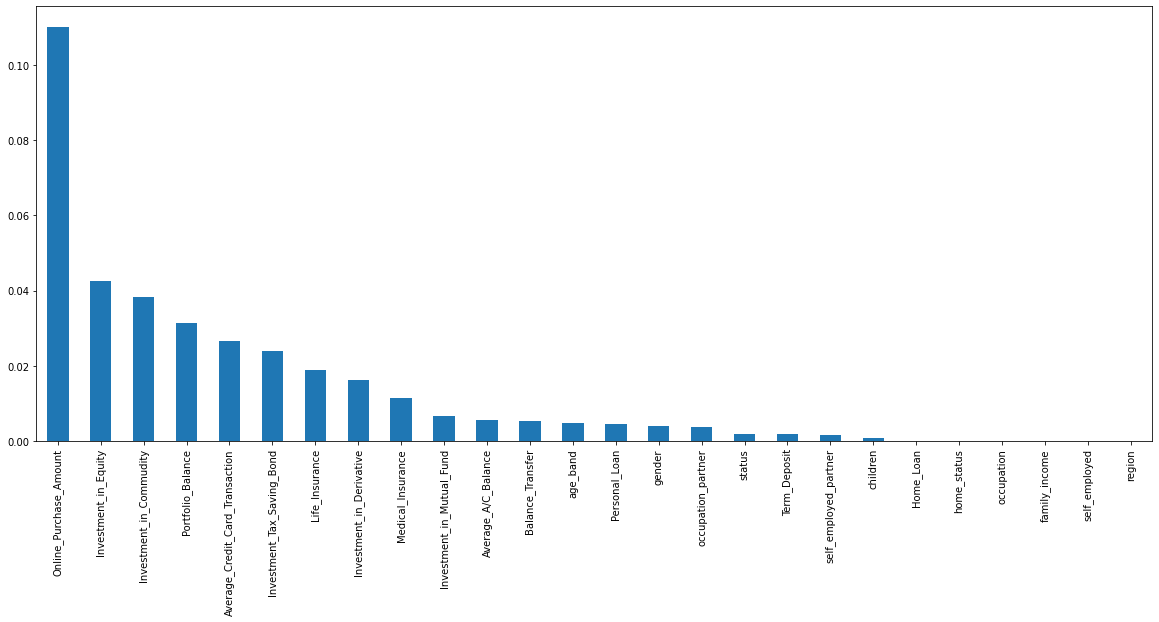

In [66]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [68]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['Average_Credit_Card_Transaction', 'Life_Insurance',
       'Medical_Insurance', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance'],
      dtype='object')

# Model training

In [71]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5,scoring='f1')
    print("Cross validation(F1) is",np.mean(score)*100)
    

In [72]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model, X, y)

Accuracy is 97.34121122599704
Cross validation(F1) is 85.05136971662823


In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print("accuracy score",accuracy_score(y_test,y_pred))

[[ 183   31]
 [  23 1794]]
              precision    recall  f1-score   support

           1       0.89      0.86      0.87       214
           2       0.98      0.99      0.99      1817

    accuracy                           0.97      2031
   macro avg       0.94      0.92      0.93      2031
weighted avg       0.97      0.97      0.97      2031

accuracy score 0.9734121122599705


# Test set prediction

In [ ]:
df1=pd.read_csv('bank_test.csv')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           2031 non-null   int64  
 1   children                         2031 non-null   object 
 2   age_band                         2031 non-null   object 
 3   status                           2031 non-null   object 
 4   occupation                       2031 non-null   object 
 5   occupation_partner               2031 non-null   object 
 6   home_status                      2031 non-null   object 
 7   family_income                    2031 non-null   object 
 8   self_employed                    2031 non-null   object 
 9   self_employed_partner            2031 non-null   object 
 10  year_last_moved                  2031 non-null   int64  
 11  TVarea                           2031 non-null   object 
 12  post_code           

In [ ]:
df1.drop(columns=['REF_NO','year_last_moved','TVarea','post_code',],inplace=True)

In [ ]:
df1[(num)]=scaler.transform(df1[(num)])

In [ ]:
Z=df1

In [ ]:
Z=oe.transform(Z)

In [ ]:
Z.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,2,11,1,5,6,1,11,1,1,636.0,0.366197,0.118704,-0.042391,-0.369039,0.972937,0.279180,-0.298571,0.065925,-0.477980,-0.444128,-0.207918,2,2,0.101884,-0.197537,-0.079301,-0.058205
1,2,1,1,7,3,1,1,1,1,1025.0,-0.454617,-0.582739,-0.504056,0.361250,0.518227,-0.051894,1.702136,1.430732,1.688112,0.910303,0.414364,2,7,-0.213851,1.567515,1.297154,1.347561
2,2,11,1,4,5,1,8,1,1,593.0,-0.454617,1.370603,-0.504056,0.022474,-0.587945,1.237483,-0.298571,1.027081,-0.477980,-0.444128,-0.207918,1,2,0.193944,0.346486,0.312308,0.083351
3,3,10,1,6,8,1,9,1,1,436.0,-0.083511,0.188380,-0.504056,-0.494253,-0.275956,-0.703655,0.904720,0.050245,-0.477980,-0.444128,-0.207918,1,3,-0.342876,0.096948,-0.058276,-0.028010
4,2,6,4,5,7,1,7,1,1,NaN,-0.454617,1.249586,-0.504056,0.606351,-0.587945,0.025239,-0.298571,-0.120531,0.073604,1.358764,-0.148896,1,7,0.412204,-0.161889,0.034433,0.125919


In [ ]:
final_pred=model.predict(Z)

In [ ]:
prediction = pd.DataFrame(final_pred).to_csv('submission.csv')